In [1]:
 #load package
using Revise
using Plots
using LaTeXStrings
using LinearAlgebra
using SparseIR
using Nevanlinna

In [2]:
# Set work data Type
T = BigFloat
setprecision(2048)

2048

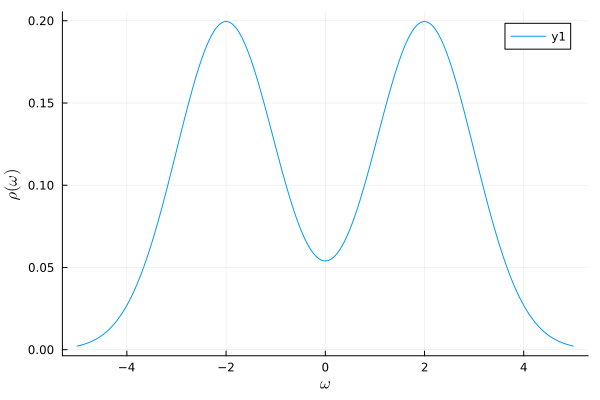

In [3]:
 #define spectral function
gaussian(x, mu, sigma) = exp(-0.5*((x-mu)/sigma)^2)/(sqrt(2*π)*sigma)
#rho(omega) = gaussian(omega, 0.0, 1.0)
rho(omega) = 0.5*gaussian(omega, 2.0, 1.0) + 0.5*gaussian(omega, -2.0, 1.0)
omegas = LinRange(-5, 5, 1000)
plot()
plot!(omegas, rho.(omegas), xlabel=latexstring("\\omega"), ylabel=latexstring("\\rho(\\omega)"))

In [4]:
function generate_input_data(rho::Function, beta::Float64)
    lambda = 1e+4
    wmax = lambda/beta
    basis = FiniteTempBasisSet(beta, wmax, 1e-15)

    rhol = [overlap(basis.basis_f.v[l], rho) for l in 1:length(basis.basis_f)]
    gl = - basis.basis_f.s .* rhol
    gw = evaluate(basis.smpl_wn_f, gl)
    
    hnw = length(basis.smpl_wn_f.sampling_points)÷2
    
    input_smpl = Array{Complex{T}}(undef, hnw) 
    input_gw   = Array{Complex{T}}(undef, hnw) 
    
    for i in 1:hnw
        input_smpl[i]= SparseIR.valueim(basis.smpl_wn_f.sampling_points[hnw+i], beta)
        input_gw[i]  = gw[hnw+i]
    end
    
    return input_smpl, input_gw
end

generate_input_data (generic function with 1 method)

In [5]:
beta = 100. #inverse temperature
input_smpl, input_gw = generate_input_data(rho, beta)
;

In [6]:
N_real    = 1000  #demension of array of output
omega_max = 10.0  #energy cutoff of real axis
eta       = 0.001 #broaden parameter 
sum_rule  = 1.0   #sum rule
H_max     = 50    #cutoff of Hardy basis
lambda    = 1e-4  #regularization parameter
iter_tol  = 1000  #upper bound of iteration
;

In [7]:
#moments = Complex{T}.([1, 0, 1, 0, 3, 0, 15, 0, 105, 0, 945])
#moments = Complex{T}.([1, 0, 1])
#moments = Complex{T}.([1])

#moments = Complex{T}.([1, 0, 5, 0, 43, 0, 499, 0, 7193, 0, 123109, 0, 2430355, 0, 54229907])
moments = Complex{T}.([1, 0, 5, 0, 43])

5-element Vector{Complex{BigFloat}}:
  1.0 + 0.0im
  0.0 + 0.0im
  5.0 + 0.0im
  0.0 + 0.0im
 43.0 + 0.0im

In [8]:
wo_ham_nev_sol = Nevanlinna.HamburgerNevanlinnaSolver(moments, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

Rank of Hankel matrix:3
Non-degenerate
Postive semi-definite
Non-singular
Positive definite
Proper
N_imag is setted as 30


In [9]:
ham_nev_sol = Nevanlinna.HamburgerNevanlinnaSolver(moments, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=true)
;

Rank of Hankel matrix:3
Non-degenerate
Postive semi-definite
Non-singular
Positive definite
Proper
N_imag is setted as 30
H=1
Iter     Function value   Gradient norm 
     0     5.822660e-01     1.734370e+00
 * time: 0.015591144561767578
     1     3.896799e-01     9.749887e-01
 * time: 1.9088079929351807
     2     3.481959e-01     7.155324e-01
 * time: 2.597102165222168
     3     2.574300e-01     1.715028e-01
 * time: 3.6996359825134277
     4     2.519761e-01     4.216214e-02
 * time: 4.770151138305664
     5     2.518439e-01     7.430777e-04
 * time: 5.864994049072266
     6     2.518438e-01     1.555046e-04
 * time: 6.576451063156128
     7     2.518438e-01     3.589196e-05
 * time: 7.315898180007935
     8     2.518438e-01     2.165771e-05
 * time: 8.406774044036865
     9     2.518438e-01     3.279631e-06
 * time: 9.12676215171814
    10     2.518438e-01     1.250200e-06
 * time: 9.872969150543213
    11     2.518438e-01     2.992597e-07
 * time: 10.894649028778076
    12     2

In [10]:
Nevanlinna.solve!(ham_nev_sol)

H=1
Iter     Function value   Gradient norm 
     0     2.518438e-01     5.216471e-09
 * time: 0.0001819133758544922
max_theta=0.208372380510642912923352310523375502500183911239657542554088857761913884278842186123601999808241157623552101191844506729840881317703749521469422976931205987594948463035657554538982643475360119933862544702119206785147588800174886107759206756074830648517577617415574086251366596686469343771592904178394408673181351280562544961414821342660447409403316727141645662685824829585795352885935912940554490322649051467855236083315368864698787548782698143589861290854951495255521870277298123706981395207279504504683472030274602099817881780802870865424692721268208316965900774289514583748342754032637661480978052016945902098140319
hardy optimization was success.
H=2
Iter     Function value   Gradient norm 
     0     2.518438e-01     1.159283e+00
 * time: 0.0002009868621826172
     1     1.672955e-01     6.039425e-01
 * time: 1.0426981449127197
     2     8.946214e-02     2.4133

max_theta=0.404436869076131279211104054017226137739741188492645801297087024880242374962057468937073172067938218073304448003239893169609887705499201987941668059352015882518856479987050069412001510992909983909476073072543271679565474981059978184028425950494503156857793895071224454108149697724894596592631534119034412342468538307477864788865264254915474791591184221912357899722235776692658368213403502269425285442129081938317506086923209149737736001969704437730780815683377410409100728126020163516943203734248200219210778890307889392729809952164675040203246546038089142675099753048597675979844987244284255025496422146199711262040609
hardy optimization was success.
H=6
Iter     Function value   Gradient norm 
     0     2.576100e-03     4.996468e-02
 * time: 0.0001850128173828125
     1     2.333975e-03     4.447173e-02
 * time: 0.8567020893096924
     2     2.162743e-03     2.526355e-02
 * time: 1.793445110321045
     3     1.986437e-03     2.630550e-02
 * time: 3.1513290405273438
     4     1.8

    29     1.260658e-04     2.967822e-06
 * time: 38.97404479980469
    30     1.260658e-04     1.313770e-06
 * time: 39.95750379562378
    31     1.260658e-04     5.967920e-07
 * time: 40.95314979553223
    32     1.260658e-04     2.225987e-07
 * time: 41.940035820007324
    33     1.260658e-04     9.296317e-08
 * time: 42.94756293296814
    34     1.260658e-04     4.334882e-08
 * time: 43.960158824920654
    35     1.260658e-04     1.611219e-08
 * time: 44.90528178215027
    36     1.260658e-04     6.303985e-09
 * time: 45.985848903656006
max_theta=0.459173498517907016889515342225285383724731704681880079657397051862957869044477830865758383586813582761239657784146031829421859941345162656473388390666029061669326252767930080569718800810781292981477049621040010630919016978371049045882313168931374547987638629244230980666397422841109019242687953115155433735296098359306049258247100086446337444544555152861552061810798980058671029403873059340554854245203915558060529368688162928569536958661991

    42     2.897776e-05     7.501783e-04
 * time: 58.191526889801025
    43     2.894527e-05     9.278942e-04
 * time: 59.817370891571045
    44     2.888945e-05     1.154582e-03
 * time: 61.378268003463745
    45     2.880673e-05     1.323750e-03
 * time: 62.944557905197144
    46     2.866042e-05     1.330677e-03
 * time: 64.51254296302795
    47     2.843064e-05     7.317498e-04
 * time: 66.18165493011475
    48     2.831845e-05     3.948548e-04
 * time: 67.83445286750793
    49     2.830668e-05     6.900669e-05
 * time: 68.8834798336029
    50     2.830591e-05     3.429392e-05
 * time: 70.46728491783142
    51     2.830579e-05     1.803547e-05
 * time: 71.48317694664001
    52     2.830575e-05     6.869208e-06
 * time: 72.55620694160461
    53     2.830575e-05     3.206353e-06
 * time: 74.23031282424927
    54     2.830574e-05     1.752248e-06
 * time: 75.71944999694824
    55     2.830574e-05     7.832903e-07
 * time: 76.73618984222412
    56     2.830574e-05     3.451820e-07
 * t

    13     1.708432e-05     3.316904e-04
 * time: 15.327419996261597
    14     1.700027e-05     2.568755e-04
 * time: 17.099375009536743
    15     1.684959e-05     2.723545e-04
 * time: 18.860402822494507
    16     1.675252e-05     1.900946e-04
 * time: 20.642480850219727
    17     1.664858e-05     3.075661e-04
 * time: 22.411160945892334
    18     1.662674e-05     1.846597e-04
 * time: 23.5710129737854
    19     1.661820e-05     1.904366e-04
 * time: 25.37874698638916
    20     1.660768e-05     1.775525e-04
 * time: 27.194252014160156
    21     1.659920e-05     2.213890e-04
 * time: 29.0259268283844
    22     1.659112e-05     1.779373e-04
 * time: 30.857446908950806
    23     1.657973e-05     2.111237e-04
 * time: 32.66646099090576
    24     1.656100e-05     1.926518e-04
 * time: 34.42179894447327
    25     1.652049e-05     3.338453e-04
 * time: 36.24973678588867
    26     1.650485e-05     3.680757e-04
 * time: 37.425007820129395
    27     1.642744e-05     6.676337e-04
 

    29     1.364999e-05     9.350348e-05
 * time: 43.08498811721802
    30     1.357095e-05     4.979031e-04
 * time: 45.42833209037781
    31     1.351536e-05     5.611833e-04
 * time: 47.1816201210022
    32     1.347512e-05     5.905154e-04
 * time: 48.37537693977356
    33     1.340851e-05     4.622057e-04
 * time: 50.25429606437683
    34     1.336701e-05     2.486590e-04
 * time: 52.057363986968994
    35     1.335092e-05     2.183150e-04
 * time: 53.84041690826416
    36     1.334683e-05     4.091023e-05
 * time: 55.04172706604004
    37     1.334433e-05     4.602728e-05
 * time: 56.82401204109192
    38     1.334258e-05     8.740750e-05
 * time: 58.66568994522095
    39     1.333921e-05     1.057952e-04
 * time: 60.463340044021606
    40     1.332275e-05     3.117449e-04
 * time: 62.88343811035156
    41     1.327232e-05     7.100673e-04
 * time: 64.67232203483582
    42     1.320022e-05     6.853564e-04
 * time: 66.54033303260803
    43     1.313616e-05     8.193555e-04
 * tim

    33     1.253719e-05     1.716892e-05
 * time: 48.51494097709656
    34     1.253699e-05     2.597546e-05
 * time: 50.299291133880615
    35     1.253682e-05     2.912920e-05
 * time: 52.03006315231323
    36     1.253646e-05     4.508832e-05
 * time: 53.775386095047
    37     1.253579e-05     7.041439e-05
 * time: 56.14388298988342
    38     1.253411e-05     1.024253e-04
 * time: 57.93888711929321
    39     1.253146e-05     1.441531e-04
 * time: 59.684322118759155
    40     1.252590e-05     2.249029e-04
 * time: 61.580626010894775
    41     1.251869e-05     2.748220e-04
 * time: 63.42942500114441
    42     1.250911e-05     3.416870e-04
 * time: 65.31013798713684
    43     1.250105e-05     3.733083e-04
 * time: 67.05901312828064
    44     1.249283e-05     4.042835e-04
 * time: 68.85192799568176
    45     1.248060e-05     3.942978e-04
 * time: 70.68033409118652
    46     1.244164e-05     2.481822e-04
 * time: 73.06963396072388
    47     1.243556e-05     8.369472e-05
 * tim

     3     1.217868e-05     1.533908e-04
 * time: 4.256185054779053
     4     1.217688e-05     1.191038e-04
 * time: 5.457690954208374
     5     1.217440e-05     1.124099e-04
 * time: 6.6830010414123535
     6     1.217197e-05     1.124524e-04
 * time: 7.853759050369263
     7     1.216910e-05     1.366796e-04
 * time: 9.012334108352661
     8     1.216546e-05     1.131181e-04
 * time: 10.171185970306396
     9     1.216171e-05     1.389019e-04
 * time: 11.325160026550293
    10     1.215796e-05     1.033121e-04
 * time: 12.511772155761719
    11     1.215369e-05     1.000289e-04
 * time: 13.676093101501465
    12     1.214974e-05     7.925407e-05
 * time: 15.490057945251465
    13     1.214552e-05     6.618285e-05
 * time: 16.83238410949707
    14     1.214177e-05     4.862940e-05
 * time: 18.0399010181427
    15     1.213883e-05     3.960939e-05
 * time: 19.365175008773804
    16     1.213587e-05     4.064157e-05
 * time: 21.24580693244934
    17     1.213395e-05     3.366227e-05
 

   123     1.195745e-05     1.885418e-05
 * time: 201.27188205718994
   124     1.195743e-05     2.524545e-05
 * time: 203.08638215065002
   125     1.195741e-05     2.546962e-05
 * time: 204.27697014808655
   126     1.195738e-05     3.394991e-05
 * time: 206.10925698280334
   127     1.195735e-05     3.423753e-05
 * time: 207.50389099121094
   128     1.195729e-05     4.541567e-05
 * time: 209.52769994735718
   129     1.195724e-05     4.577818e-05
 * time: 210.841490983963
   130     1.195714e-05     6.032780e-05
 * time: 212.75487804412842
   131     1.195705e-05     6.078292e-05
 * time: 214.0820541381836
   132     1.195686e-05     7.944776e-05
 * time: 216.47648215293884
   133     1.195672e-05     8.000546e-05
 * time: 217.9310941696167
   134     1.195638e-05     1.029016e-04
 * time: 219.8876919746399
   135     1.195614e-05     1.036035e-04
 * time: 221.18858814239502
   136     1.195553e-05     1.296394e-04
 * time: 223.11933994293213
   137     1.195510e-05     1.303487e-0

    73     1.189042e-05     2.039369e-05
 * time: 129.3297049999237
    74     1.189032e-05     1.311798e-05
 * time: 131.5325059890747
    75     1.189030e-05     9.628734e-06
 * time: 132.9321949481964
    76     1.189028e-05     8.844627e-06
 * time: 134.85089492797852
    77     1.189027e-05     3.200073e-06
 * time: 136.14472103118896
    78     1.189026e-05     6.835735e-06
 * time: 138.10912609100342
    79     1.189025e-05     4.051624e-06
 * time: 139.47407507896423
    80     1.189024e-05     1.052163e-05
 * time: 141.64155793190002
    81     1.189023e-05     8.661148e-06
 * time: 143.00064706802368
    82     1.189021e-05     1.484011e-05
 * time: 145.04892206192017
    83     1.189020e-05     1.334791e-05
 * time: 146.32840204238892
    84     1.189017e-05     2.167075e-05
 * time: 148.39605593681335
    85     1.189015e-05     2.061951e-05
 * time: 149.78302192687988
    86     1.189011e-05     2.971402e-05
 * time: 151.8453950881958
    87     1.189008e-05     2.875385e-

H=17
Iter     Function value   Gradient norm 
     0     1.184279e-05     1.485061e-04
 * time: 0.00021600723266601562
     1     1.184210e-05     9.548294e-05
 * time: 1.3685832023620605
     2     1.184177e-05     4.293286e-05
 * time: 2.6307339668273926
     3     1.184159e-05     5.379180e-05
 * time: 4.647741079330444
     4     1.184140e-05     3.811158e-05
 * time: 5.995293140411377
     5     1.184114e-05     4.827577e-05
 * time: 7.412791013717651
     6     1.184091e-05     3.512215e-05
 * time: 9.080753087997437
     7     1.184063e-05     3.983265e-05
 * time: 10.49956202507019
     8     1.184029e-05     4.071772e-05
 * time: 11.850941181182861
     9     1.183991e-05     3.555007e-05
 * time: 13.156121969223022
    10     1.183952e-05     3.055279e-05
 * time: 14.509479999542236
    11     1.183908e-05     2.271366e-05
 * time: 15.819689989089966
    12     1.183866e-05     2.570894e-05
 * time: 17.282922983169556
    13     1.183819e-05     2.917036e-05
 * time: 18.72708

   119     1.181845e-05     1.035446e-04
 * time: 216.30044317245483
   120     1.181811e-05     1.045197e-04
 * time: 217.5924940109253
   121     1.181710e-05     1.469182e-04
 * time: 219.676509141922
   122     1.181641e-05     1.557865e-04
 * time: 221.04176211357117
   123     1.181428e-05     1.633550e-04
 * time: 223.68746900558472
   124     1.181035e-05     1.361061e-04
 * time: 225.7605481147766
   125     1.180579e-05     1.709469e-04
 * time: 227.68221807479858
   126     1.180359e-05     6.947023e-05
 * time: 229.06484508514404
   127     1.180259e-05     5.311183e-05
 * time: 231.08715105056763
   128     1.180233e-05     3.398100e-05
 * time: 232.46297907829285
   129     1.180213e-05     2.838684e-05
 * time: 234.56030797958374
   130     1.180206e-05     1.194907e-05
 * time: 235.99637913703918
   131     1.180202e-05     1.315702e-05
 * time: 238.37203001976013
   132     1.180201e-05     6.174709e-06
 * time: 239.6930491924286
   133     1.180200e-05     5.998282e-0

    17     1.179739e-05     1.196274e-05
 * time: 23.738048791885376
    18     1.179726e-05     8.638661e-06
 * time: 25.182134866714478
    19     1.179716e-05     9.793557e-06
 * time: 26.62335991859436
    20     1.179701e-05     7.280244e-06
 * time: 29.894490957260132
    21     1.179690e-05     8.489865e-06
 * time: 31.82481098175049
    22     1.179678e-05     1.315102e-05
 * time: 33.75469398498535
    23     1.179668e-05     1.033791e-05
 * time: 35.09565782546997
    24     1.179660e-05     3.890072e-06
 * time: 37.07743191719055
    25     1.179652e-05     7.002591e-06
 * time: 39.113844871520996
    26     1.179646e-05     8.217372e-06
 * time: 41.12257099151611
    27     1.179641e-05     3.483686e-06
 * time: 43.0471727848053
    28     1.179638e-05     7.594338e-06
 * time: 45.56719899177551
    29     1.179635e-05     7.720426e-06
 * time: 47.52964687347412
    30     1.179629e-05     9.853482e-06
 * time: 49.49181079864502
    31     1.179626e-05     3.352990e-06
 * t

   137     1.179142e-05     7.641281e-06
 * time: 241.2746388912201
   138     1.179141e-05     9.383813e-06
 * time: 243.21375584602356
   139     1.179141e-05     9.214624e-06
 * time: 244.523188829422
   140     1.179141e-05     1.124964e-05
 * time: 247.05302786827087
   141     1.179140e-05     1.110047e-05
 * time: 248.34431886672974
   142     1.179140e-05     1.349650e-05
 * time: 250.28896188735962
   143     1.179140e-05     1.338053e-05
 * time: 251.59038281440735
   144     1.179139e-05     1.606658e-05
 * time: 253.5634059906006
   145     1.179139e-05     1.594788e-05
 * time: 254.79434895515442
   146     1.179138e-05     1.900367e-05
 * time: 256.66706800460815
   147     1.179137e-05     1.888506e-05
 * time: 257.96641993522644
   148     1.179136e-05     2.247131e-05
 * time: 259.966561794281
   149     1.179135e-05     2.238451e-05
 * time: 261.2919428348541
   150     1.179134e-05     2.655124e-05
 * time: 263.31627082824707
   151     1.179132e-05     2.649321e-05


   257     1.178816e-05     8.663042e-07
 * time: 418.64068698883057
   258     1.178816e-05     9.097378e-07
 * time: 419.91883277893066
   259     1.178816e-05     9.420904e-07
 * time: 421.30808091163635
   260     1.178816e-05     9.890575e-07
 * time: 422.6292748451233
   261     1.178816e-05     1.024088e-06
 * time: 424.0250267982483
   262     1.178816e-05     1.074884e-06
 * time: 425.3090498447418
   263     1.178816e-05     1.112818e-06
 * time: 426.5658149719238
   264     1.178816e-05     1.167764e-06
 * time: 428.4396369457245
   265     1.178816e-05     1.208848e-06
 * time: 429.6986680030823
   266     1.178816e-05     1.268295e-06
 * time: 431.03477692604065
   267     1.178816e-05     1.312796e-06
 * time: 432.3761148452759
   268     1.178816e-05     1.377127e-06
 * time: 433.72486782073975
   269     1.178816e-05     1.425338e-06
 * time: 434.9855988025665
   270     1.178816e-05     1.494966e-06
 * time: 436.249205827713
   271     1.178816e-05     1.547207e-06
 * 

    14     1.178750e-05     7.145176e-06
 * time: 19.338629961013794
    15     1.178748e-05     6.529429e-06
 * time: 20.83006191253662
    16     1.178746e-05     4.833926e-06
 * time: 22.67513084411621
    17     1.178744e-05     4.365322e-06
 * time: 23.992213010787964
    18     1.178742e-05     4.080637e-06
 * time: 25.325901985168457
    19     1.178739e-05     3.955829e-06
 * time: 26.64405393600464
    20     1.178737e-05     3.771366e-06
 * time: 28.003841876983643
    21     1.178735e-05     4.321416e-06
 * time: 29.530117988586426
    22     1.178733e-05     3.821223e-06
 * time: 30.87895894050598
    23     1.178730e-05     2.696396e-06
 * time: 32.282970905303955
    24     1.178728e-05     2.935236e-06
 * time: 34.314167976379395
    25     1.178725e-05     3.151084e-06
 * time: 36.33207583427429
    26     1.178721e-05     5.016492e-06
 * time: 38.279013872146606
    27     1.178719e-05     1.008700e-05
 * time: 40.26869583129883
    28     1.178717e-05     5.505594e-06

   134     1.178645e-05     2.359127e-06
 * time: 219.79774689674377
   135     1.178645e-05     2.430313e-06
 * time: 221.0756540298462
   136     1.178645e-05     2.599420e-06
 * time: 222.36063694953918
   137     1.178645e-05     2.676692e-06
 * time: 223.65027785301208
   138     1.178645e-05     2.853868e-06
 * time: 224.94723892211914
   139     1.178645e-05     2.937366e-06
 * time: 226.23444890975952
   140     1.178645e-05     3.123003e-06
 * time: 227.5824179649353
   141     1.178645e-05     3.212808e-06
 * time: 229.0309808254242
   142     1.178645e-05     3.407586e-06
 * time: 230.4127118587494
   143     1.178645e-05     3.503892e-06
 * time: 231.79940605163574
   144     1.178645e-05     3.708494e-06
 * time: 233.10553097724915
   145     1.178645e-05     3.811567e-06
 * time: 234.57703804969788
   146     1.178645e-05     4.026522e-06
 * time: 235.8751699924469
   147     1.178645e-05     4.136660e-06
 * time: 237.27791094779968
   148     1.178645e-05     4.362434e-0

   254     1.178617e-05     4.192566e-06
 * time: 382.8802659511566
   255     1.178617e-05     4.224681e-06
 * time: 384.1583528518677
   256     1.178617e-05     4.612610e-06
 * time: 385.4366309642792
   257     1.178617e-05     4.649324e-06
 * time: 386.68665504455566
   258     1.178617e-05     5.068321e-06
 * time: 387.9571318626404
   259     1.178617e-05     5.109865e-06
 * time: 389.2241199016571
   260     1.178617e-05     5.562872e-06
 * time: 391.14479184150696
   261     1.178617e-05     5.609589e-06
 * time: 392.42285990715027
   262     1.178617e-05     6.099761e-06
 * time: 394.3289170265198
   263     1.178617e-05     6.152143e-06
 * time: 395.6745409965515
   264     1.178617e-05     6.682925e-06
 * time: 397.61651492118835
   265     1.178617e-05     6.741512e-06
 * time: 398.9277229309082
   266     1.178617e-05     7.316768e-06
 * time: 400.82207202911377
   267     1.178617e-05     7.382074e-06
 * time: 402.0839378833771
   268     1.178617e-05     8.006147e-06
 *

    31     1.177917e-05     2.528091e-05
 * time: 50.37492108345032
    32     1.177908e-05     1.086134e-05
 * time: 52.54777216911316
    33     1.177904e-05     3.624272e-06
 * time: 54.737059116363525
    34     1.177901e-05     6.944246e-06
 * time: 57.63740611076355
    35     1.177893e-05     1.425321e-05
 * time: 59.67227005958557
    36     1.177884e-05     1.254902e-05
 * time: 61.85665512084961
    37     1.177872e-05     1.568430e-05
 * time: 64.17417216300964
    38     1.177862e-05     9.211911e-06
 * time: 66.27202415466309
    39     1.177852e-05     8.674464e-06
 * time: 68.38652515411377
    40     1.177846e-05     9.172043e-06
 * time: 70.31324410438538
    41     1.177839e-05     9.558322e-06
 * time: 72.57544302940369
    42     1.177837e-05     5.820160e-06
 * time: 74.64134311676025
    43     1.177835e-05     9.091130e-06
 * time: 76.00242304801941
    44     1.177833e-05     4.077307e-06
 * time: 78.0665831565857
    45     1.177831e-05     7.555954e-06
 * time

   151     1.177476e-05     6.174932e-06
 * time: 258.3352200984955
   152     1.177476e-05     6.647302e-06
 * time: 259.6632640361786
   153     1.177476e-05     6.691990e-06
 * time: 260.98073410987854
   154     1.177476e-05     7.186692e-06
 * time: 262.3003900051117
   155     1.177476e-05     7.238595e-06
 * time: 263.61461997032166
   156     1.177476e-05     7.757480e-06
 * time: 264.93413400650024
   157     1.177476e-05     7.816706e-06
 * time: 266.25010800361633
   158     1.177476e-05     8.362250e-06
 * time: 267.57514214515686
   159     1.177476e-05     8.428772e-06
 * time: 268.8893041610718
   160     1.177476e-05     9.002209e-06
 * time: 270.2033610343933
   161     1.177476e-05     9.076601e-06
 * time: 271.5036201477051
   162     1.177476e-05     9.679373e-06
 * time: 272.81825518608093
   163     1.177476e-05     9.761866e-06
 * time: 274.145437002182
   164     1.177475e-05     1.039640e-05
 * time: 275.4994070529938
   165     1.177475e-05     1.048748e-05
 *

   271     1.177296e-05     4.224338e-06
 * time: 446.8618440628052
   272     1.177296e-05     4.614794e-06
 * time: 449.17390418052673
   273     1.177296e-05     4.597866e-06
 * time: 450.46944308280945
   274     1.177296e-05     5.012302e-06
 * time: 452.37101101875305
   275     1.177296e-05     4.996788e-06
 * time: 453.66215801239014
   276     1.177296e-05     5.436928e-06
 * time: 455.5780370235443
   277     1.177295e-05     5.422719e-06
 * time: 456.88755202293396
   278     1.177295e-05     5.890478e-06
 * time: 458.9361791610718
   279     1.177295e-05     5.877691e-06
 * time: 460.99409317970276
   280     1.177295e-05     6.375171e-06
 * time: 463.01020097732544
   281     1.177295e-05     6.363989e-06
 * time: 464.5680351257324
   282     1.177295e-05     6.893374e-06
 * time: 466.6598300933838
   283     1.177295e-05     6.883845e-06
 * time: 467.9931411743164
   284     1.177295e-05     7.447443e-06
 * time: 470.07961797714233
   285     1.177295e-05     7.439518e-06

   392     1.176700e-05     3.567164e-08
 * time: 649.2742731571198
   393     1.176700e-05     4.755111e-08
 * time: 650.6564900875092
   394     1.176700e-05     4.379859e-08
 * time: 652.0360450744629
   395     1.176700e-05     5.572478e-08
 * time: 653.4752781391144
   396     1.176700e-05     5.233147e-08
 * time: 654.9064700603485
   397     1.176700e-05     6.448184e-08
 * time: 656.6122541427612
   398     1.176700e-05     6.132672e-08
 * time: 658.806645154953
   399     1.176700e-05     7.371176e-08
 * time: 660.2829301357269
   400     1.176700e-05     7.090077e-08
 * time: 661.7093420028687
   401     1.176700e-05     8.358124e-08
 * time: 663.1175100803375
   402     1.176700e-05     8.114021e-08
 * time: 664.5553920269012
   403     1.176700e-05     9.422977e-08
 * time: 666.0798799991608
   404     1.176700e-05     9.207384e-08
 * time: 667.5506680011749
   405     1.176700e-05     1.056559e-07
 * time: 668.9733850955963
   406     1.176700e-05     1.036666e-07
 * time:

   513     1.176699e-05     4.952385e-06
 * time: 828.9091200828552
   514     1.176699e-05     4.968670e-06
 * time: 830.1973531246185
   515     1.176699e-05     5.270314e-06
 * time: 831.5134391784668
   516     1.176699e-05     5.287804e-06
 * time: 832.8684320449829
   517     1.176699e-05     5.609002e-06
 * time: 834.2315030097961
   518     1.176699e-05     5.627787e-06
 * time: 835.5191960334778
   519     1.176699e-05     5.969912e-06
 * time: 836.7663199901581
   520     1.176699e-05     5.990092e-06
 * time: 838.1172740459442
   521     1.176699e-05     6.354628e-06
 * time: 839.5378770828247
   522     1.176699e-05     6.376312e-06
 * time: 841.4756021499634
   523     1.176699e-05     6.764869e-06
 * time: 842.7743060588837
   524     1.176699e-05     6.788174e-06
 * time: 844.1278231143951
   525     1.176699e-05     7.202500e-06
 * time: 845.479236125946
   526     1.176699e-05     7.227556e-06
 * time: 846.8491051197052
   527     1.176699e-05     7.669549e-06
 * time:

     8     1.176522e-05     2.055833e-05
 * time: 11.380340099334717
     9     1.176518e-05     1.827199e-05
 * time: 12.749722957611084
    10     1.176513e-05     1.982888e-05
 * time: 14.0883150100708
    11     1.176505e-05     1.714211e-05
 * time: 15.463321924209595
    12     1.176498e-05     1.696850e-05
 * time: 16.81491994857788
    13     1.176491e-05     1.761228e-05
 * time: 18.22742199897766
    14     1.176482e-05     2.267999e-05
 * time: 19.61447811126709
    15     1.176472e-05     1.617131e-05
 * time: 20.997334957122803
    16     1.176461e-05     2.249177e-05
 * time: 22.41600799560547
    17     1.176448e-05     1.799447e-05
 * time: 23.891894102096558
    18     1.176436e-05     1.620687e-05
 * time: 25.4287691116333
    19     1.176423e-05     1.669472e-05
 * time: 27.423155069351196
    20     1.176411e-05     7.523764e-06
 * time: 28.73290705680847
    21     1.176396e-05     1.594215e-05
 * time: 30.75443696975708
    22     1.176388e-05     1.666762e-05
 * 

   128     1.175734e-05     1.427383e-05
 * time: 228.99719095230103
   129     1.175731e-05     2.134646e-05
 * time: 231.05446314811707
   130     1.175729e-05     1.932127e-05
 * time: 232.40765595436096
   131     1.175726e-05     2.389132e-05
 * time: 234.42165398597717
   132     1.175724e-05     2.135276e-05
 * time: 235.8706820011139
   133     1.175720e-05     2.934498e-05
 * time: 238.10433197021484
   134     1.175717e-05     2.786328e-05
 * time: 239.59193801879883
   135     1.175712e-05     3.227566e-05
 * time: 241.79754614830017
   136     1.175709e-05     3.038483e-05
 * time: 243.26852297782898
   137     1.175703e-05     3.961444e-05
 * time: 245.38251996040344
   138     1.175700e-05     3.920096e-05
 * time: 246.9039270877838
   139     1.175692e-05     4.031865e-05
 * time: 249.17555212974548
   140     1.175688e-05     3.991536e-05
 * time: 250.64567303657532
   141     1.175678e-05     5.110423e-05
 * time: 253.08537793159485
   142     1.175673e-05     5.109116

   248     1.174632e-05     1.225154e-06
 * time: 448.02012395858765
   249     1.174632e-05     7.249575e-07
 * time: 449.62568712234497
   250     1.174632e-05     8.233871e-07
 * time: 451.19265699386597
   251     1.174632e-05     4.488736e-07
 * time: 452.77290415763855
   252     1.174632e-05     5.912574e-07
 * time: 454.40752601623535
   253     1.174632e-05     2.942610e-07
 * time: 456.0316209793091
   254     1.174632e-05     4.918765e-07
 * time: 458.37076711654663
   255     1.174632e-05     1.694497e-07
 * time: 459.95586705207825
   256     1.174632e-05     3.900348e-07
 * time: 462.7580020427704
   257     1.174631e-05     1.581196e-07
 * time: 464.4142210483551
   258     1.174631e-05     3.821949e-07
 * time: 467.6415719985962
   259     1.174631e-05     2.292066e-07
 * time: 469.3680491447449
   260     1.174631e-05     4.141602e-07
 * time: 471.80917596817017
   261     1.174631e-05     3.285628e-07
 * time: 473.4518389701843
   262     1.174631e-05     4.739846e-07

   369     1.174617e-05     3.042780e-05
 * time: 690.275838136673
   370     1.174616e-05     3.265142e-05
 * time: 692.8284130096436
   371     1.174615e-05     3.243044e-05
 * time: 694.3873701095581
   372     1.174614e-05     3.481479e-05
 * time: 696.6828210353851
   373     1.174613e-05     3.458068e-05
 * time: 698.2095649242401
   374     1.174612e-05     3.714195e-05
 * time: 700.5411410331726
   375     1.174611e-05     3.689367e-05
 * time: 702.1623201370239
   376     1.174609e-05     3.965061e-05
 * time: 704.5712900161743
   377     1.174608e-05     3.938699e-05
 * time: 706.1232061386108
   378     1.174606e-05     4.236147e-05
 * time: 708.4193720817566
   379     1.174605e-05     4.208121e-05
 * time: 709.940770149231
   380     1.174602e-05     4.529923e-05
 * time: 712.2442419528961
   381     1.174601e-05     4.500094e-05
 * time: 713.7604470252991
   382     1.174598e-05     4.849405e-05
 * time: 716.0353240966797
   383     1.174596e-05     4.817641e-05
 * time: 

   490     1.173530e-05     4.344397e-07
 * time: 915.8238229751587
   491     1.173530e-05     4.254305e-07
 * time: 917.3417699337006
   492     1.173530e-05     4.681977e-07
 * time: 919.7117080688477
   493     1.173530e-05     4.589098e-07
 * time: 921.2706620693207
   494     1.173530e-05     5.038752e-07
 * time: 923.5603229999542
   495     1.173530e-05     4.941387e-07
 * time: 925.0804319381714
   496     1.173530e-05     5.416216e-07
 * time: 927.4028220176697
   497     1.173530e-05     5.314922e-07
 * time: 928.9208149909973
   498     1.173530e-05     5.817058e-07
 * time: 931.1912250518799
   499     1.173530e-05     5.712462e-07
 * time: 932.7201540470123
   500     1.173530e-05     6.243068e-07
 * time: 935.0840580463409
   501     1.173530e-05     6.135356e-07
 * time: 936.6395020484924
   502     1.173530e-05     6.695453e-07
 * time: 938.9090580940247
   503     1.173530e-05     6.584056e-07
 * time: 940.4946420192719
   504     1.173530e-05     7.175005e-07
 * time

   610     1.173525e-05     1.950871e-05
 * time: 1155.8998610973358
   611     1.173524e-05     1.930036e-05
 * time: 1157.672369003296
   612     1.173524e-05     2.077236e-05
 * time: 1160.1256530284882
   613     1.173523e-05     2.054981e-05
 * time: 1161.7746250629425
   614     1.173523e-05     2.212516e-05
 * time: 1164.1347670555115
   615     1.173523e-05     2.188720e-05
 * time: 1165.8135409355164
   616     1.173522e-05     2.357487e-05
 * time: 1168.3365850448608
   617     1.173522e-05     2.332017e-05
 * time: 1170.011922121048
   618     1.173521e-05     2.513026e-05
 * time: 1172.4405689239502
   619     1.173520e-05     2.485729e-05
 * time: 1174.0144309997559
   620     1.173520e-05     2.680128e-05
 * time: 1176.326915025711
   621     1.173519e-05     2.650835e-05
 * time: 1177.9083859920502
   622     1.173518e-05     2.859963e-05
 * time: 1180.3378081321716
   623     1.173517e-05     2.828454e-05
 * time: 1182.0525290966034
   624     1.173516e-05     3.053899e

    33     1.172449e-05     9.324669e-06
 * time: 57.99423909187317
    34     1.172446e-05     7.063386e-06
 * time: 60.18258309364319
    35     1.172442e-05     7.549177e-06
 * time: 62.3162739276886
    36     1.172441e-05     2.428119e-06
 * time: 64.5163938999176
    37     1.172439e-05     4.366499e-06
 * time: 67.47673106193542
    38     1.172438e-05     2.622509e-06
 * time: 70.16190195083618
    39     1.172437e-05     2.573393e-06
 * time: 72.28258895874023
    40     1.172436e-05     5.453162e-06
 * time: 74.41263508796692
    41     1.172434e-05     4.664821e-06
 * time: 76.61050295829773
    42     1.172433e-05     3.115359e-06
 * time: 78.73227190971375
    43     1.172432e-05     3.316850e-06
 * time: 81.39751291275024
    44     1.172430e-05     4.394305e-06
 * time: 83.4529139995575
    45     1.172429e-05     3.614204e-06
 * time: 85.51665687561035
    46     1.172428e-05     2.078484e-06
 * time: 87.61240792274475
    47     1.172428e-05     2.961253e-06
 * time: 9

   153     1.172386e-05     2.201142e-06
 * time: 253.60395503044128
   154     1.172386e-05     4.134251e-07
 * time: 254.86981105804443
   155     1.172386e-05     2.329896e-06
 * time: 256.2281608581543
   156     1.172386e-05     5.003871e-07
 * time: 258.0554749965668
   157     1.172386e-05     2.649259e-06
 * time: 259.36657190322876
   158     1.172386e-05     6.096784e-07
 * time: 260.68380999565125
   159     1.172386e-05     3.027619e-06
 * time: 262.0537269115448
   160     1.172386e-05     8.424009e-07
 * time: 263.38502192497253
   161     1.172385e-05     3.352753e-06
 * time: 264.69246792793274
   162     1.172385e-05     1.179995e-06
 * time: 266.0140690803528
   163     1.172385e-05     3.565728e-06
 * time: 267.42393589019775
   164     1.172385e-05     1.567112e-06
 * time: 269.0537588596344
   165     1.172385e-05     3.655980e-06
 * time: 270.54387307167053
   166     1.172385e-05     1.965835e-06
 * time: 271.9026219844818
   167     1.172385e-05     3.650074e-06

   273     1.172377e-05     5.362601e-06
 * time: 419.84299492836
   274     1.172377e-05     5.489552e-06
 * time: 421.1508779525757
   275     1.172377e-05     5.641858e-06
 * time: 422.53865909576416
   276     1.172376e-05     5.843836e-06
 * time: 423.9551348686218
   277     1.172376e-05     5.917943e-06
 * time: 425.34617590904236
   278     1.172376e-05     6.185079e-06
 * time: 426.71165204048157
   279     1.172376e-05     6.193124e-06
 * time: 428.62305903434753
   280     1.172376e-05     6.511287e-06
 * time: 429.98100900650024
   281     1.172376e-05     6.466625e-06
 * time: 431.3066210746765
   282     1.172376e-05     6.819848e-06
 * time: 432.76651906967163
   283     1.172376e-05     6.735700e-06
 * time: 434.1159930229187
   284     1.172376e-05     7.108590e-06
 * time: 435.4705169200897
   285     1.172376e-05     6.996965e-06
 * time: 436.81404304504395
   286     1.172376e-05     7.377135e-06
 * time: 438.1382510662079
   287     1.172375e-05     7.247725e-06
 *

   394     1.172360e-05     5.413717e-06
 * time: 585.6504418849945
   395     1.172360e-05     7.347080e-06
 * time: 586.9486730098724
   396     1.172360e-05     5.885301e-06
 * time: 588.2290909290314
   397     1.172360e-05     7.716166e-06
 * time: 589.561084985733
   398     1.172360e-05     6.364878e-06
 * time: 590.8217959403992
   399     1.172359e-05     8.060340e-06
 * time: 592.0973858833313
   400     1.172359e-05     6.845748e-06
 * time: 593.4472880363464
   401     1.172359e-05     8.375533e-06
 * time: 595.3342750072479
   402     1.172359e-05     7.320302e-06
 * time: 596.595134973526
   403     1.172359e-05     8.662226e-06
 * time: 597.9125468730927
   404     1.172358e-05     7.781650e-06
 * time: 599.2413830757141
   405     1.172358e-05     8.925644e-06
 * time: 600.5589420795441
   406     1.172358e-05     8.225327e-06
 * time: 601.8997559547424
   407     1.172358e-05     9.176129e-06
 * time: 603.1738770008087
   408     1.172358e-05     8.651054e-06
 * time: 

   515     1.172318e-05     3.777388e-06
 * time: 753.197998046875
   516     1.172318e-05     3.096803e-06
 * time: 754.5223450660706
   517     1.172318e-05     4.083967e-06
 * time: 755.8498249053955
   518     1.172317e-05     3.414052e-06
 * time: 757.1726469993591
   519     1.172317e-05     4.278749e-06
 * time: 758.5508120059967
   520     1.172317e-05     3.646415e-06
 * time: 759.9827690124512
   521     1.172317e-05     4.339765e-06
 * time: 761.2979629039764
   522     1.172317e-05     3.776446e-06
 * time: 762.6202929019928
   523     1.172317e-05     4.271541e-06
 * time: 763.9303209781647
   524     1.172317e-05     3.804218e-06
 * time: 765.2619009017944
   525     1.172316e-05     4.101323e-06
 * time: 766.5842649936676
   526     1.172316e-05     3.746306e-06
 * time: 767.9083530902863
   527     1.172316e-05     3.871894e-06
 * time: 769.2224290370941
   528     1.172316e-05     3.630869e-06
 * time: 770.5492250919342
   529     1.172316e-05     3.632380e-06
 * time:

   636     1.172313e-05     9.154221e-07
 * time: 923.2395780086517
   637     1.172313e-05     9.240142e-07
 * time: 924.5465269088745
   638     1.172313e-05     8.792260e-07
 * time: 925.8254818916321
   639     1.172313e-05     8.776911e-07
 * time: 927.1745400428772
   640     1.172313e-05     8.429379e-07
 * time: 928.4667489528656
   641     1.172313e-05     8.319558e-07
 * time: 929.7336158752441
   642     1.172313e-05     8.053278e-07
 * time: 931.0248210430145
   643     1.172313e-05     7.864065e-07
 * time: 932.5010359287262
   644     1.172313e-05     7.654537e-07
 * time: 934.2239229679108
   645     1.172313e-05     7.408991e-07
 * time: 935.5350499153137
   646     1.172313e-05     7.228237e-07
 * time: 936.8436620235443
   647     1.172313e-05     6.955049e-07
 * time: 938.148738861084
   648     1.172313e-05     6.773671e-07
 * time: 939.4485809803009
   649     1.172313e-05     6.504339e-07
 * time: 940.7280578613281
   650     1.172313e-05     6.292382e-07
 * time:

   756     1.172312e-05     7.087094e-07
 * time: 1089.3375000953674
   757     1.172312e-05     6.063735e-07
 * time: 1090.7046270370483
   758     1.172312e-05     6.923612e-07
 * time: 1091.983283996582
   759     1.172312e-05     5.790127e-07
 * time: 1093.3766379356384
   760     1.172312e-05     6.754898e-07
 * time: 1094.7436480522156
   761     1.172312e-05     5.510485e-07
 * time: 1096.6125690937042
   762     1.172312e-05     6.580043e-07
 * time: 1097.915582895279
   763     1.172312e-05     5.227116e-07
 * time: 1099.2595570087433
   764     1.172312e-05     6.396899e-07
 * time: 1100.6058778762817
   765     1.172312e-05     4.941771e-07
 * time: 1101.916631937027
   766     1.172312e-05     6.202149e-07
 * time: 1103.2133660316467
   767     1.172312e-05     4.655259e-07
 * time: 1104.5757489204407
   768     1.172312e-05     5.991568e-07
 * time: 1105.9016199111938
   769     1.172312e-05     4.371059e-07
 * time: 1107.25665807724
   770     1.172312e-05     5.760428e-0

   876     1.172311e-05     4.348420e-07
 * time: 1254.9299380779266
   877     1.172311e-05     4.541105e-07
 * time: 1256.2411210536957
   878     1.172311e-05     4.560125e-07
 * time: 1257.5767199993134
   879     1.172311e-05     4.714216e-07
 * time: 1258.9035699367523
   880     1.172311e-05     4.762697e-07
 * time: 1260.2709040641785
   881     1.172311e-05     4.894947e-07
 * time: 1262.0980610847473
   882     1.172311e-05     4.955114e-07
 * time: 1263.3874020576477
   883     1.172311e-05     5.081508e-07
 * time: 1264.7236640453339
   884     1.172311e-05     5.137658e-07
 * time: 1266.0572619438171
   885     1.172311e-05     5.272845e-07
 * time: 1267.3739168643951
   886     1.172311e-05     5.311998e-07
 * time: 1268.687038898468
   887     1.172311e-05     5.468743e-07
 * time: 1269.970803976059
   888     1.172311e-05     5.481072e-07
 * time: 1271.2883250713348
   889     1.172311e-05     5.669744e-07
 * time: 1272.6855940818787
   890     1.172311e-05     5.648730

   996     1.172309e-05     7.500781e-07
 * time: 1417.4702608585358
   997     1.172309e-05     7.713609e-07
 * time: 1418.7401790618896
   998     1.172309e-05     7.505073e-07
 * time: 1420.0167820453644
   999     1.172309e-05     7.726892e-07
 * time: 1421.2679889202118
  1000     1.172309e-05     7.498604e-07
 * time: 1422.550343990326
Faild to optimize!
max_theta=0.720778733636054969637459916204772134344339565764910707186468151516703946241816119898408246820138752597192784628472730033099852356873524164429837747969277735956007148331948183330396466894522668144561618061864923553598995292807283130033011628048059117669142845219400813763176262043338200398232107691317686940748345028843471381971540299750549122710308025591498208781450847695364002300188244346845903759711424130789123637443817782510606524796491994591296072895134876147244324524494913486225845094766402881396263045063785957365356384201792511435162913501250195820467028832792528568151271599597358940471735737460666564594553
hardy 

In [11]:
wo_sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

N_imag is setted as 33


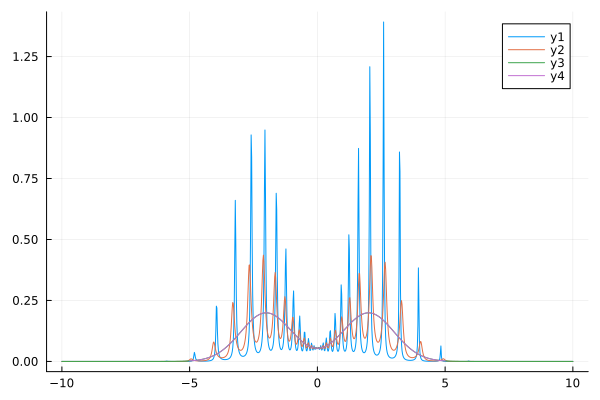

In [12]:
plot()
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val)/pi)
plot!(Float64.(real.((wo_ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(wo_ham_nev_sol.val))/pi)
plot!(Float64.(real.((ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(ham_nev_sol.val))/pi)
plot!(omegas, rho.(omegas))

In [14]:
function calc_moment_k(x::AbstractVector, y::AbstractVector,k::Int64)
    N = length(x)
    dx = view(x, 2:N) .- view(x, 1:(N-1))
    
    xk = x.^(k-1)
    
    y = y .* xk
    
    y_forward = view(y, 2:N)
    y_backward = view(y, 1:(N-1))
    return sum(0.5 * (y_forward .+ y_backward) .* dx)
end

calc_moment_k (generic function with 1 method)

In [21]:
calc_moment_k(real.((ham_nev_sol.nev_st.reals.freq)), Float64.(imag.(ham_nev_sol.val))/pi, 5)

43.29218595639057951459379856252384217761226188070473947582731538091991002898450251122726810102001697466474829601507978791190171929046301622928786495153414804187427701536674278631943299982845049476045891142902878238067371995966541371124599525477330370371237986478407879372186392130487930796078899220447055995464324951171875

In [32]:
cut = 5
calc_moment = Vector{Float64}(undef,5)
for i in 1:cut
    calc_moment[i] = Float64(calc_moment_k(real.((wo_ham_nev_sol.nev_st.reals.freq)), Float64.(imag.(wo_ham_nev_sol.val))/pi, i))
end

In [31]:
moments

5-element Vector{Complex{BigFloat}}:
  1.0 + 0.0im
  0.0 + 0.0im
  5.0 + 0.0im
  0.0 + 0.0im
 43.0 + 0.0im

In [33]:
calc_moment 

5-element Vector{Float64}:
  0.9999328252706802
  2.1117052430510528e-10
  5.005359475447759
 -8.294576805137473e-9
 43.293142029878446